# GRIP Task 1 - Prediction using Supervised ML

*   Predict the percentage of a student based on the no. of study hours
*   What will be the predicted score if a student studies for 9.25 hrs/day?




### Importing the necessary libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading the dataset

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)

### Data Summarization

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


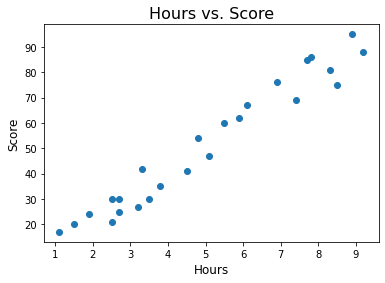

In [8]:
plt.scatter(df['Hours'], df['Scores'])
plt.title("Hours vs. Score", fontsize = 16)
plt.xlabel("Hours", fontsize = 12)
plt.ylabel("Score", fontsize = 12)
plt.show()

### Splitting the dataset into Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Training the Simple Linear Regression model on the Training set

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualizing the Results

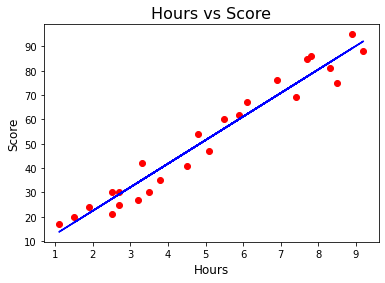

In [11]:
plt.scatter(X, y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Hours vs Score', fontsize=16)
plt.xlabel('Hours', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.show()

### Comparing Actual Scores with Predicted Scores

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df0 = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})
df0

,Actual Score,Predicted Score
0,21,27.285592
1,30,29.221192
2,95,89.224787
3,24,21.478793
4,69,74.707788


### Checking Model Accuracy

In [14]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9737301038839304

### Predicting Score for a Student who Studies 9.25 hrs/day

In [15]:
student_score = regressor.predict([[9.25]])
print("Marks Scored: ", round(student_score[0], 2))

Marks Scored:  92.61


# **Conclusion**
### *A student who studies for 9.25 hrs/day will score 92.61 marks.*